<a href="https://colab.research.google.com/github/JaebinChoi/Recommendation-System/blob/master/content_based_recommendation2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wELrh5CKheto0X6wRJMryXrwckwGyF_TZlYFH7ZwyC5bNBZ5nTUrZM
Mounted at /gdrive
/gdrive


In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

path = '/gdrive/My Drive/Recommend'

### Read Data

In [3]:
ratings =  pd.read_pickle('%s/data/ml-latest-small/ratings_updated.p' % path)
genres = pd.read_pickle('%s/data/ml-latest-small/genres.p' % path)

In [4]:
ratings.sample()

,userId,movieId,rating,timestamp
20524,135,2571,5.0,2001-12-30 05:45:44


In [5]:
genres.sample()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
65225,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


### User Profile (Sample Data)

In [6]:
user414 = ratings[ratings['userId'] == 414]
user414.sample()

,userId,movieId,rating,timestamp
63429,414,3499,4.0,2000-06-30 13:29:55


In [7]:
# 영화 관람을 엄청 많이 함
len(user414)

2698

In [8]:
# user414의 movieId를 기준으로, genres의 index를 기준으로 조인
user414 = user414.merge(genres, left_on='movieId', right_index=True)

In [9]:
user414.sample()

,userId,movieId,rating,timestamp,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
63049,414,2188,2.0,2000-06-19 17:41:09,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


### train_test_split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(user414[genres.columns], user414['rating'], random_state=42, test_size=42)

In [12]:
# feature, x : y를 예측하기 위해 필요한 정보들
# label, y : 정답

print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(2656, 20)
(42, 20)
(2656,)
(42,)


In [13]:
x_train.sample()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
62689,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
y_train.sample()

64665    4.0
Name: rating, dtype: float64

### Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
reg = LinearRegression()

In [17]:
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
reg.coef_

array([ 1.04160282, -0.16765085,  0.11266998,  0.6470244 , -0.28636112,
       -0.07175291,  0.1755062 ,  0.42369745,  0.32260747,  0.06520916,
        0.30005944, -0.16750376,  0.34178126,  0.01701818,  0.20658032,
       -0.0161549 ,  0.17045366, -0.13324596,  0.42657798,  0.29761732])

In [19]:
reg.intercept_

3.2083971762035204

In [20]:
# baseline score + Action 장르에 대한 coefficient + Adventure 장르에 대한 coefficient
# Action | Adventure
reg.intercept_ + reg.coef_[1] + reg.coef_[2]

3.1534163068395666

In [21]:
list(zip(x_train.columns, reg.coef_))

[('(no genres listed)', 1.0416028237964734),
 ('Action', -0.16765084808775782),
 ('Adventure', 0.11266997872380434),
 ('Animation', 0.647024400468364),
 ('Children', -0.28636112002225117),
 ('Comedy', -0.07175290614434772),
 ('Crime', 0.17550620046289703),
 ('Documentary', 0.4236974512206153),
 ('Drama', 0.3226074723097408),
 ('Fantasy', 0.06520916285712705),
 ('Film-Noir', 0.30005944367866516),
 ('Horror', -0.16750376258635977),
 ('IMAX', 0.34178126430889216),
 ('Musical', 0.01701817648759844),
 ('Mystery', 0.20658032435950804),
 ('Romance', -0.016154901772133756),
 ('Sci-Fi', 0.17045366312859975),
 ('Thriller', -0.13324596244305084),
 ('War', 0.42657798213011566),
 ('Western', 0.29761731969867855)]

In [22]:
%matplotlib inline

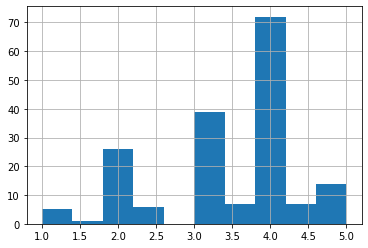

In [23]:
# user414['rating'].hist()

# Children 장르의 평점 히스토그램
user414.loc[user414['Children'] == 1, 'rating'].hist()

In [24]:
# 전체 장르에 대한 예측값
predict = reg.predict(x_test)

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
mse = mean_squared_error(y_test, predict)
rmse = np.sqrt(mse)
rmse

0.8233059773739537

## 전체 데이터로 확장

In [28]:
ratings = ratings.merge(genres, left_on='movieId', right_index=True)
ratings.sample()

,userId,movieId,rating,timestamp,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
75885,477,8622,4.0,2008-01-21 18:31:09,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
train, test = train_test_split(ratings, test_size=0.1, random_state=42)

In [35]:
user_profile_list = []

for userId in train['userId'].unique(): # 존재하는 User Id를 반복
  user = train[train['userId'] == userId]
  X_train = user[genres.columns] # feature, x
  Y_train = user['rating'] # label, y

  reg = LinearRegression()
  reg.fit(X_train, Y_train)

  # * : 리스트를 flatten하게
  # intercept : 유저가 장르가 하나도 없는 영화를 봤을 때 줄 예상 평점
    user_profile_list.append([reg.intercept_, *reg.coef_])ㅊ
  user_profile_list.append([reg.intercept_, *reg.coef_])

In [39]:
user_profile = pd.DataFrame(user_profile_list, index=train['userId'].unique(), columns=['intercept', *genres.columns])
pd.set_option('float_format', '{:f}'.format)

In [41]:
user_profile

,intercept,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
555,3.332390,0.000000,-0.160754,0.080151,0.200893,0.304954,0.041948,0.199470,-0.000000,0.242010,0.042381,-0.347746,-0.523428,0.345450,-0.182105,0.205982,0.105405,0.014659,0.142177,0.273489,-0.217147
352,3.994093,0.000000,-0.500851,0.193432,0.747634,-1.087313,-0.411920,0.111596,-0.000000,0.004380,-0.103565,-0.913539,0.227009,0.158518,-1.069132,0.338183,-0.253827,0.035034,-0.206804,1.036792,0.175006
448,2.593686,-1.343686,-0.140043,0.251257,0.424714,-0.054141,0.201930,0.155109,1.258631,0.263548,-0.063345,0.798158,-0.483713,-0.135406,0.406815,0.071140,-0.125329,-0.031419,0.007405,0.325445,0.677385
594,3.798197,0.000000,0.838477,-0.150309,0.449669,0.237607,-0.197516,0.174569,0.701803,-0.251599,0.028075,0.000000,-1.965431,0.228982,-0.110104,-0.455544,0.930986,0.393527,-0.193798,-0.326242,0.549628
500,2.536337,0.000000,0.665123,-0.062306,0.460453,0.094984,0.355523,-0.049842,-0.000000,0.095288,0.226253,0.000000,-0.340806,0.196528,0.039346,1.462196,0.085466,0.602231,0.092420,0.927386,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
544,4.130435,0.000000,1.478261,-0.000000,-0.000000,-0.000000,0.391304,-2.086957,0.869565,0.478261,0.000000,0.000000,0.869565,0.000000,0.000000,-0.521739,-0.043478,0.478261,-1.086957,0.000000,0.000000
519,3.795026,0.000000,-0.251394,0.152123,0.000000,0.000000,0.070137,0.513520,0.000000,0.586699,-0.000000,0.000000,-0.000000,0.152123,0.000000,0.050392,-0.063489,0.152123,0.305757,0.611628,0.000000
311,4.829617,0.000000,-1.415954,0.050970,0.462762,0.462762,-2.806110,-0.000000,-0.000000,-0.395860,-0.558422,-0.000000,-0.829617,0.500000,-2.433757,0.358951,-0.704822,-0.411792,-0.052841,0.107078,-1.173710
